Step 1 : Importing Required Libraries

In [2]:

# Importing Necessary Libraries :
''' Import all of the libraries needed for our investigation, including those for data 
loading, statistical analysis, visualizations, univariate and bivariate analysis, etc.'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Step 2 : Reading the Dataset

In [4]:

# loading and reading the Dataset :

Superstore = pd.read_csv("superstore.csv",encoding='latin1')
Superstore.head(2)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [5]:

# Making a Copy of the Dataset :
'''When performing data manipulation or preprocessing, it is a good practice to create a copy
of the original dataset. This ensures the original data remains unaltered and can be referred
to later if needed.'''

Superstore_copy = Superstore.copy()


Step 3 : Analyzing the Data

In [7]:

# Shape of the data :
'''shape will show how many features (columns) and observations (rows) there are in the
dataset.'''

Superstore_copy.shape


(51290, 24)

In [8]:

#Data information :
'''info() facilitates comprehension of the data type and related information, such as the 
quantity of records in each column, whether the data is null or not, the type of data, 
and the dataset’s memory use.'''

Superstore_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [9]:
# Convert 'Order Date' and 'Ship Date' columns from object to datetime format

Superstore_copy['Order Date'] = pd.to_datetime(Superstore_copy['Order Date'])
Superstore_copy['Ship Date'] = pd.to_datetime(Superstore_copy['Ship Date'])


In [10]:

# Describing the data :
'''The DataSet Airbnb_copy is statistically summarized by the code Airbnb_copy.describe(),
which gives the count, mean, standard deviation, minimum, and quartiles for each 
numerical column. The dataset’s central tendencies and spread are briefly summarized.'''

Superstore_copy.describe()


,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375915
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296804


In [11]:

# Column to list :
'''The code Airbnb_copy.columns.tolist() converts the column names of the DataSet ‘Airbnb_copy’ into a 
Python list, providing a convenient way to access and manipulate column names.'''

Superstore_copy.columns.tolist()


['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Postal Code',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Order Priority']

In [12]:

# Re-naming the Columns And Verifying :
'''When column names contain spaces, it is recommended to remove or replace the spaces 
with underscores. This helps to avoid errors or syntax issues during operations like 
missing value treatment or data manipulation'''

Superstore_copy.columns = Superstore_copy.columns.str.replace(' ', '_')
Superstore_copy.columns = Superstore_copy.columns.str.replace('-', '_')
Superstore_copy.columns.tolist()


['Row_ID',
 'Order_ID',
 'Order_Date',
 'Ship_Date',
 'Ship_Mode',
 'Customer_ID',
 'Customer_Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Postal_Code',
 'Market',
 'Region',
 'Product_ID',
 'Category',
 'Sub_Category',
 'Product_Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping_Cost',
 'Order_Priority']

In [13]:

# Checking for the duplicate values :
'''To ensure the data is free from redundancy, we need to check for any duplicate rows 
across all columns (Numerical, Categorical, and Datetime). Identifying duplicates
allows us to assess the quality of the data and take appropriate action, such as 
removing or handling these duplicates to maintain data integrity.'''

Superstore_copy.duplicated().sum()


0

In [14]:

# Checking for Missing values :
'''The code Airbnb_copy.isnull().sum() checks for missing values in each column of the DataSet
‘Airbnb_copy’ and returns the sum of null values for each column'''

Superstore_copy.isnull().sum()


Row_ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer_Name         0
Segment               0
City                  0
State                 0
Country               0
Postal_Code       41296
Market                0
Region                0
Product_ID            0
Category              0
Sub_Category          0
Product_Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
dtype: int64

In [15]:

# Separating Date-time, Numerical and Categorical columns and Verifying :
'''Separating numerical and categorical columns is an essential step in data preprocessing
because the techniques used to analyze, process, and impute these data types are often
different'''

datetime_cols = Superstore_copy.select_dtypes(include=['datetime']).columns
numerical_cols = Superstore_copy.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = Superstore_copy.select_dtypes(include=['object', 'category']).columns


In [16]:
datetime_cols

Index(['Order_Date', 'Ship_Date'], dtype='object')

In [17]:
numerical_cols

Index(['Row_ID', 'Postal_Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Cost'],
      dtype='object')

In [18]:
categorical_cols

Index(['Order_ID', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment',
       'City', 'State', 'Country', 'Market', 'Region', 'Product_ID',
       'Category', 'Sub_Category', 'Product_Name', 'Order_Priority'],
      dtype='object')

In [19]:

# Replacing Missing Values with Statistical Measures and Verifying :
''' For Datetime Data: Impute missing values with the median date. This can be useful
when working with datetime columns that may have missing timestamps.'''

for col in datetime_cols:
    Superstore_copy[col].fillna(Superstore_copy[col].median(), inplace=True)

'''For Numerical Data: Impute missing values with the median. This is useful when the 
data is skewed, as the median is less sensitive to outliers compared to the mean.'''

for col in numerical_cols:
    Superstore_copy[col].fillna(Superstore_copy[col].median(), inplace=True)
    
'''For Categorical Data: Impute missing values with the mode (the most frequent value). 
This is often used when dealing with categorical variables to fill in missing data with
the most common category.'''

for col in categorical_cols:
    Superstore_copy[col].fillna(Superstore_copy[col].mode()[0], inplace=True)

Superstore_copy.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
City              0
State             0
Country           0
Postal_Code       0
Market            0
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
Shipping_Cost     0
Order_Priority    0
dtype: int64

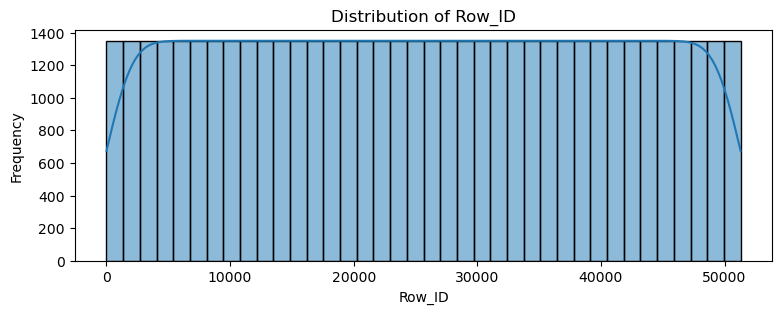

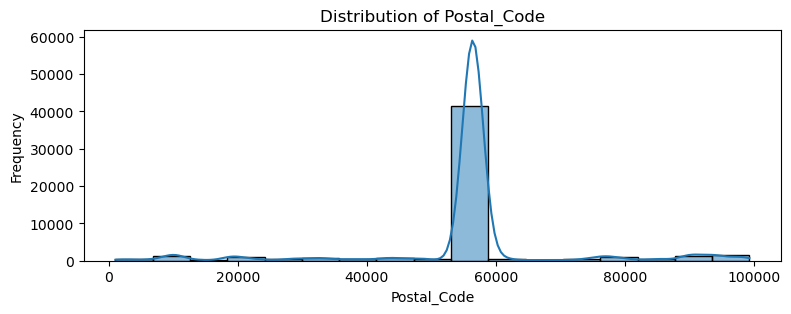

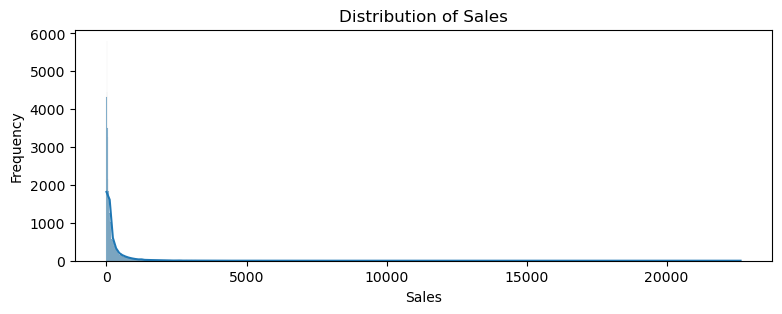

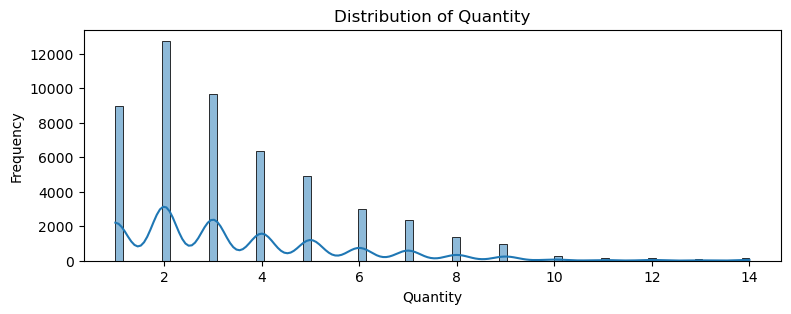

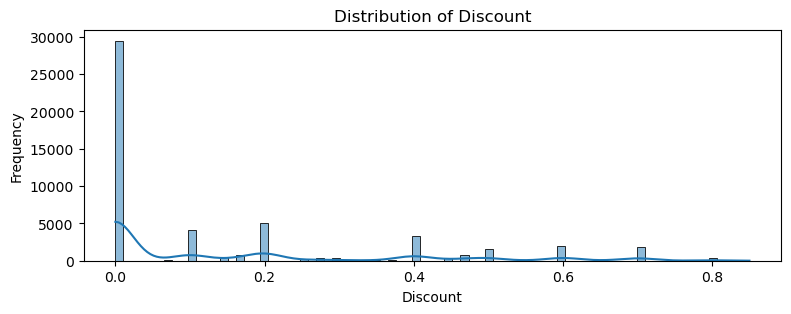

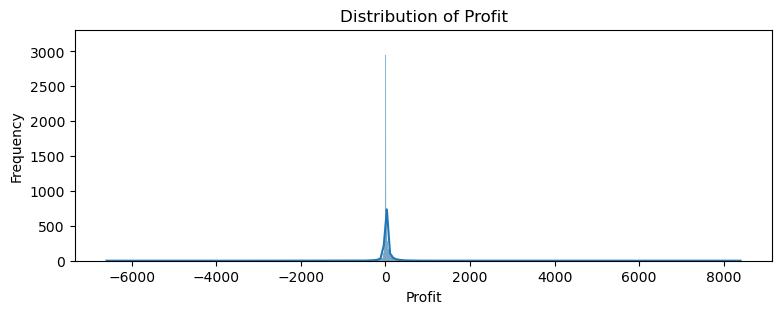

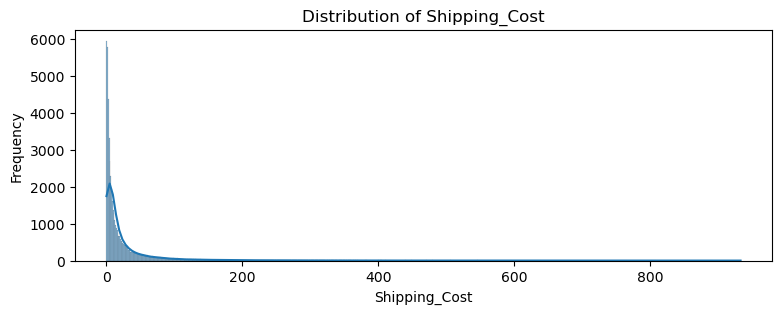

In [20]:

#Distribution of numerical variables:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = Superstore_copy.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(9, 3))
    sns.histplot(Superstore_copy[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


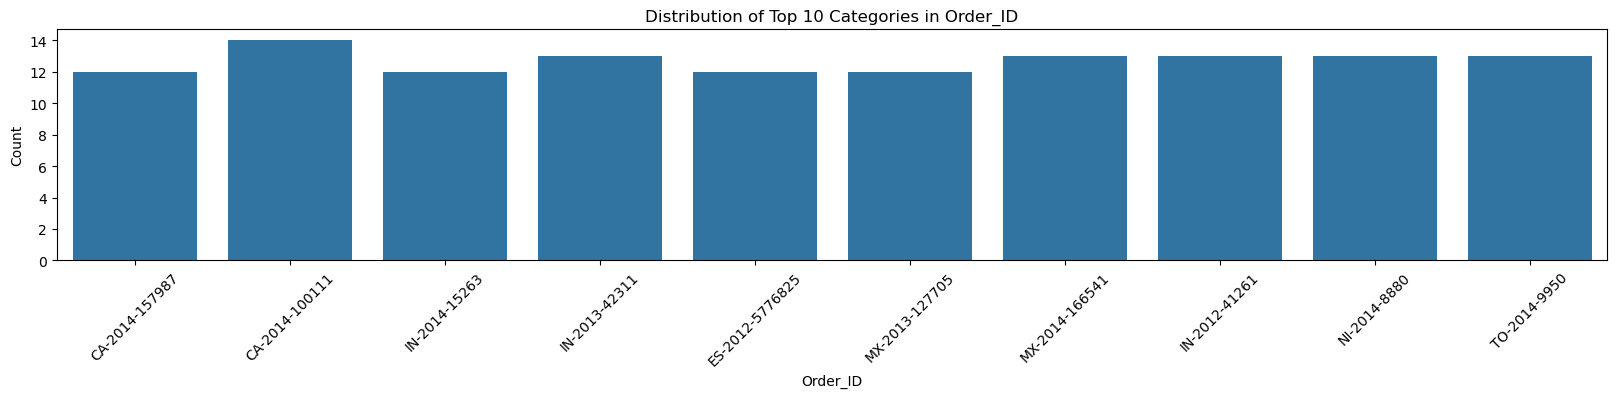

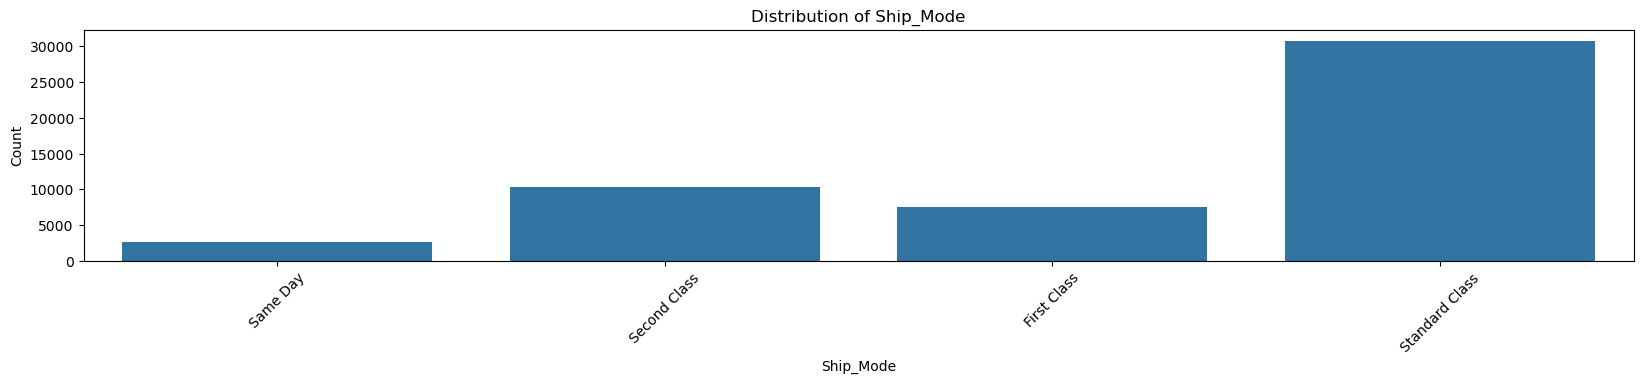

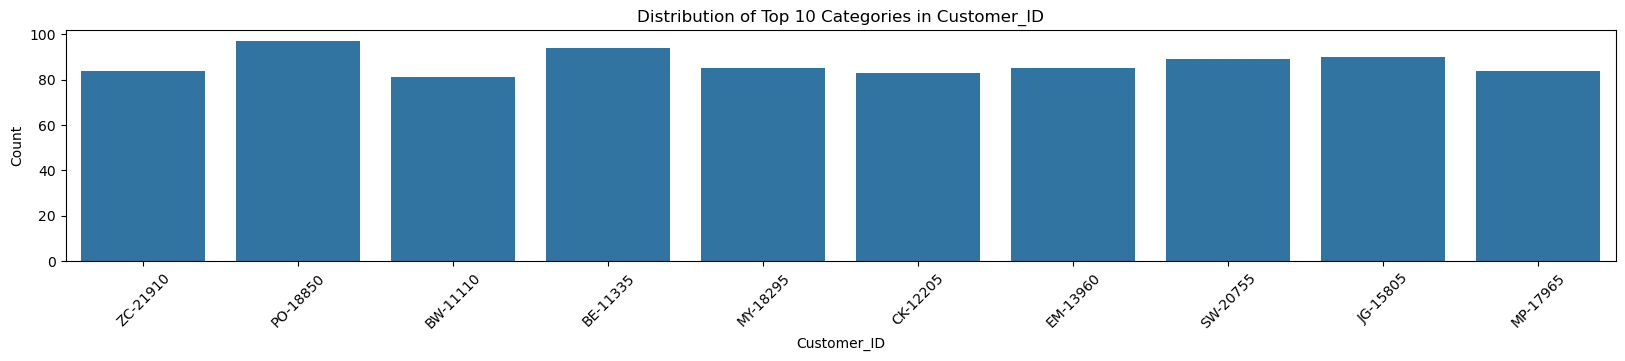

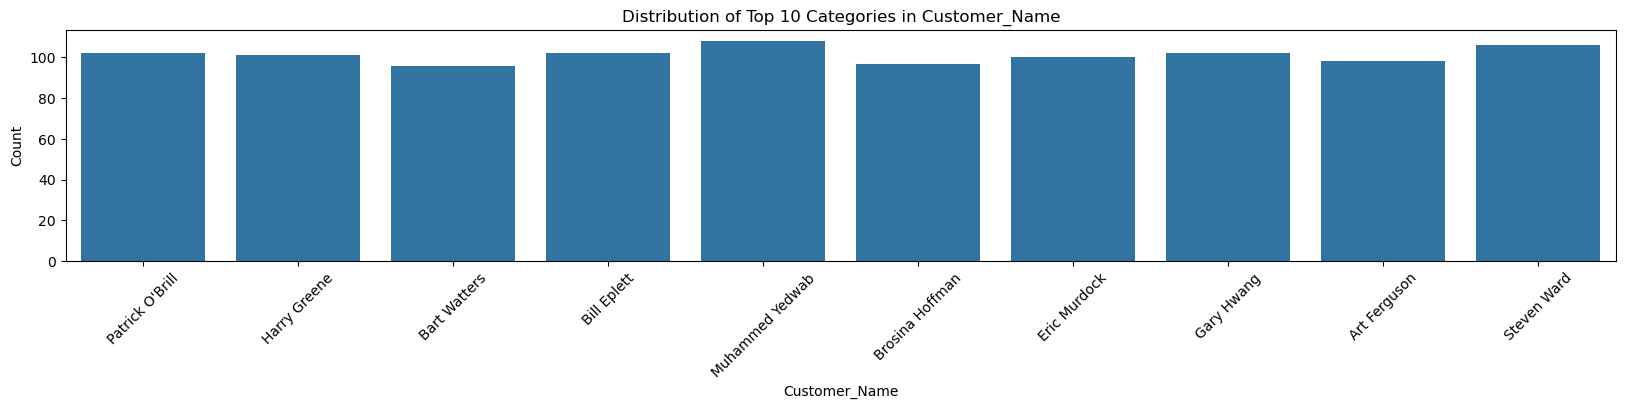

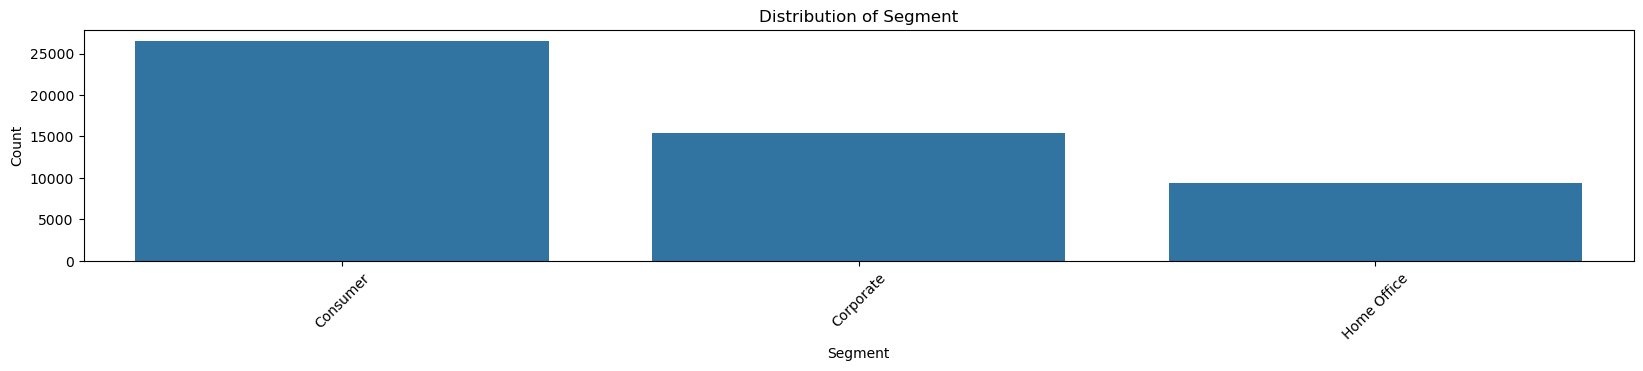

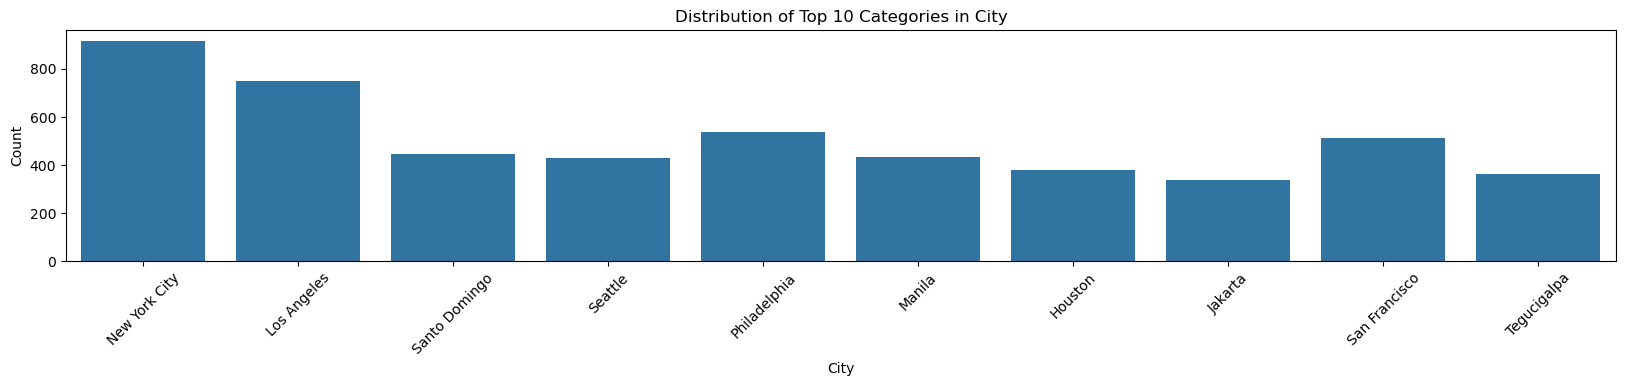

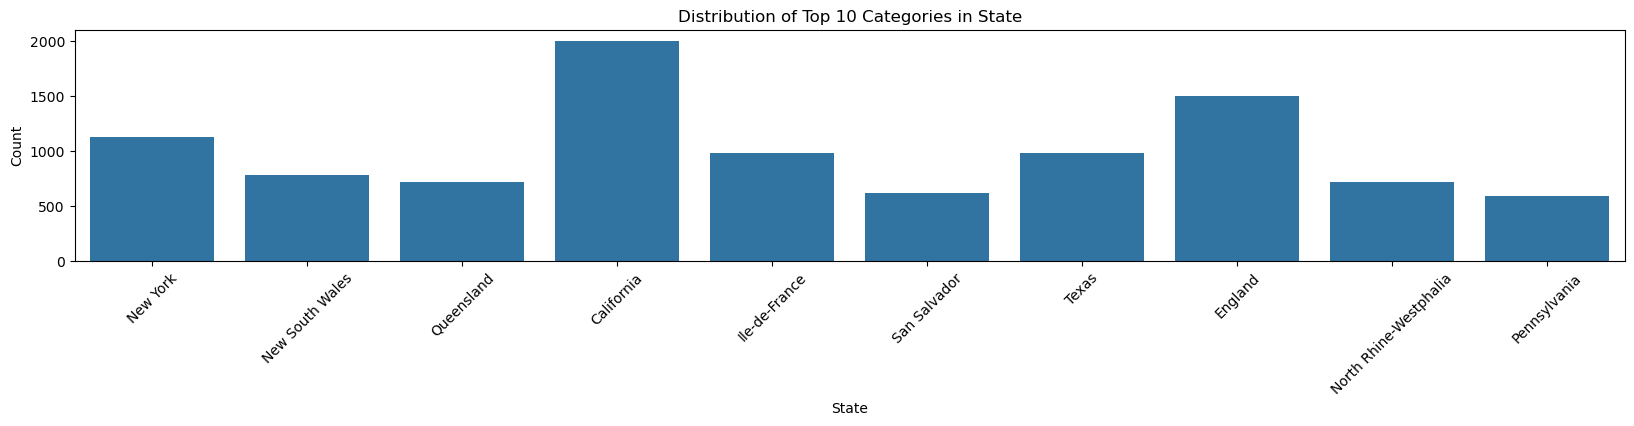

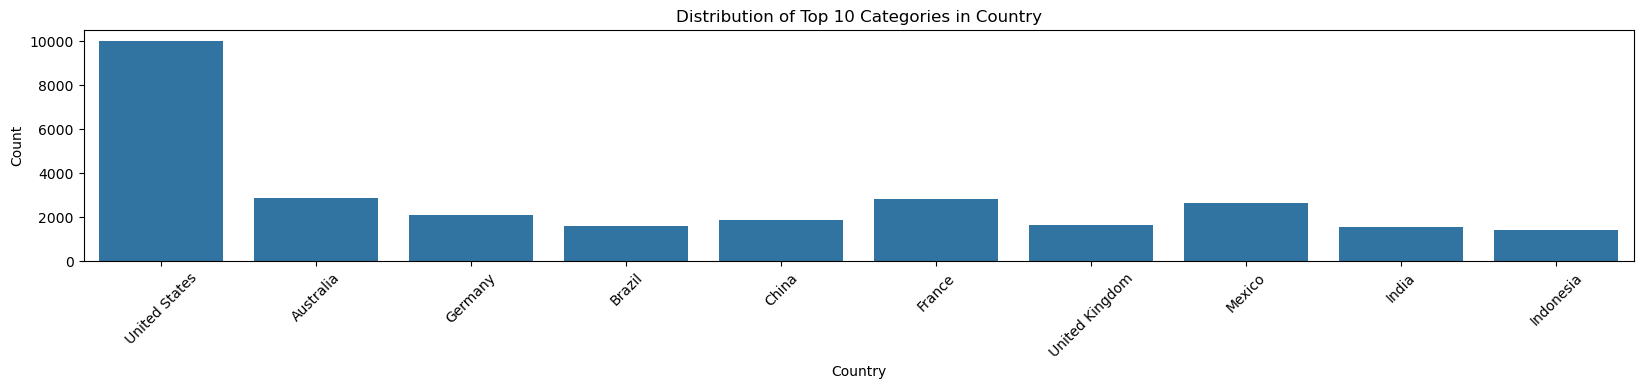

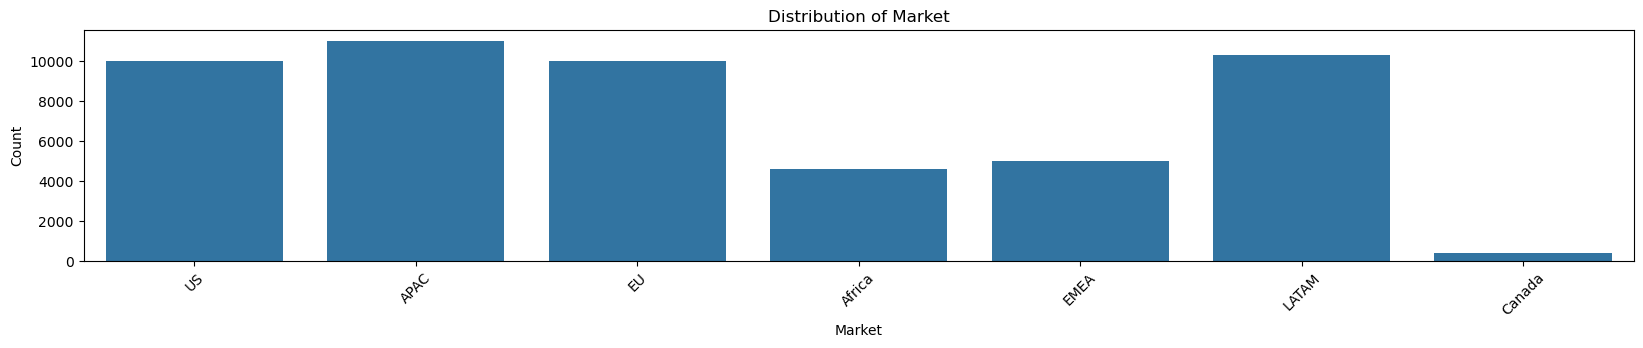

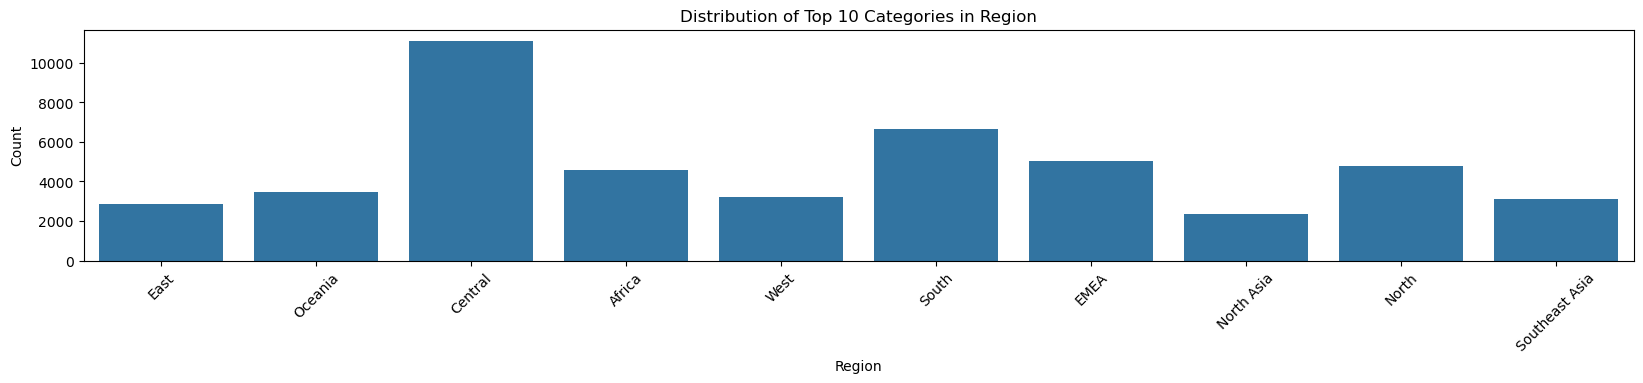

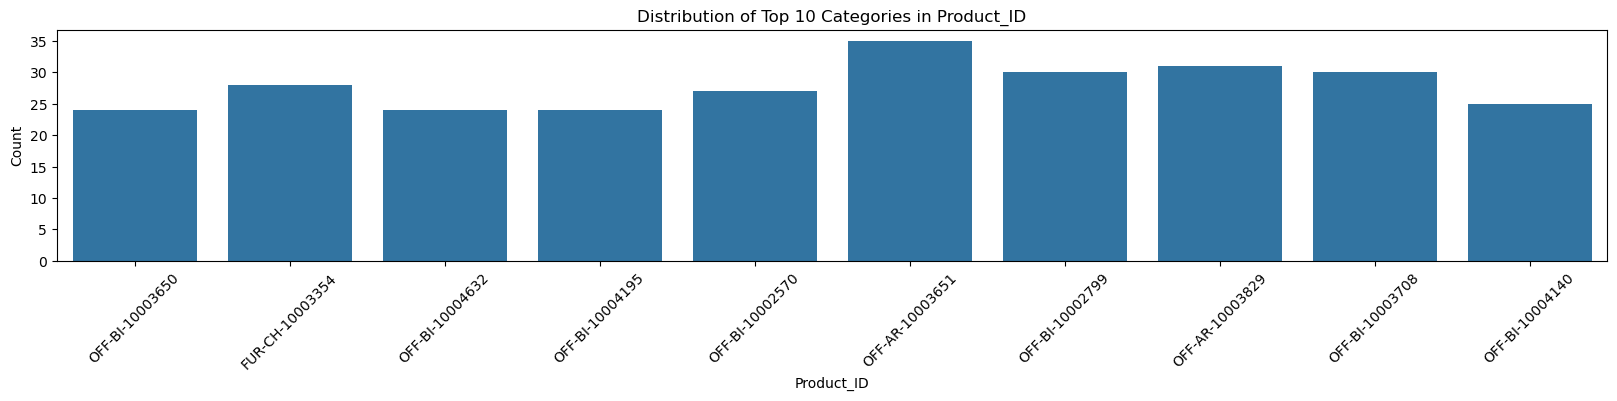

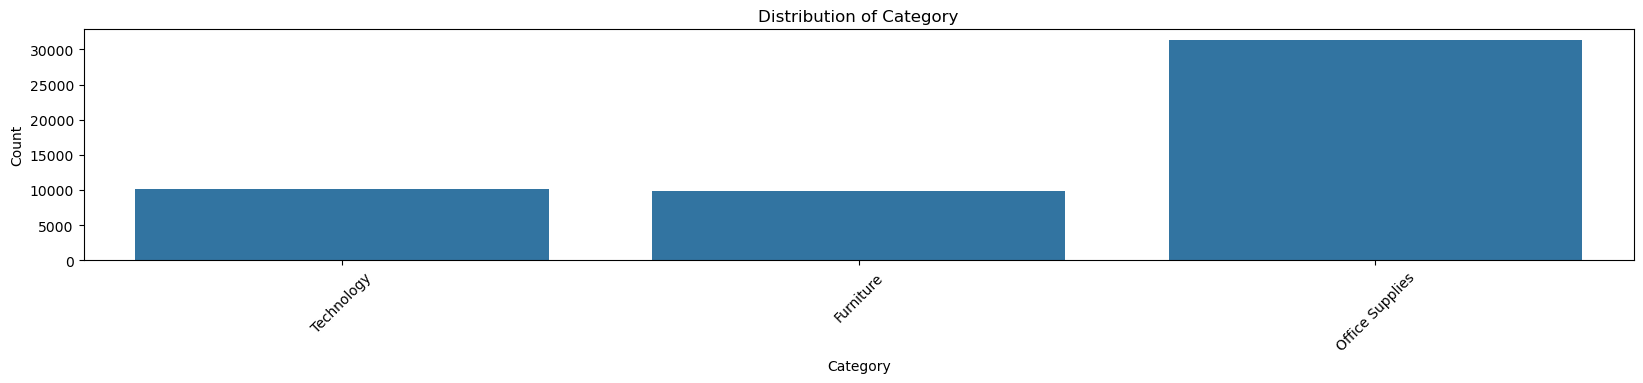

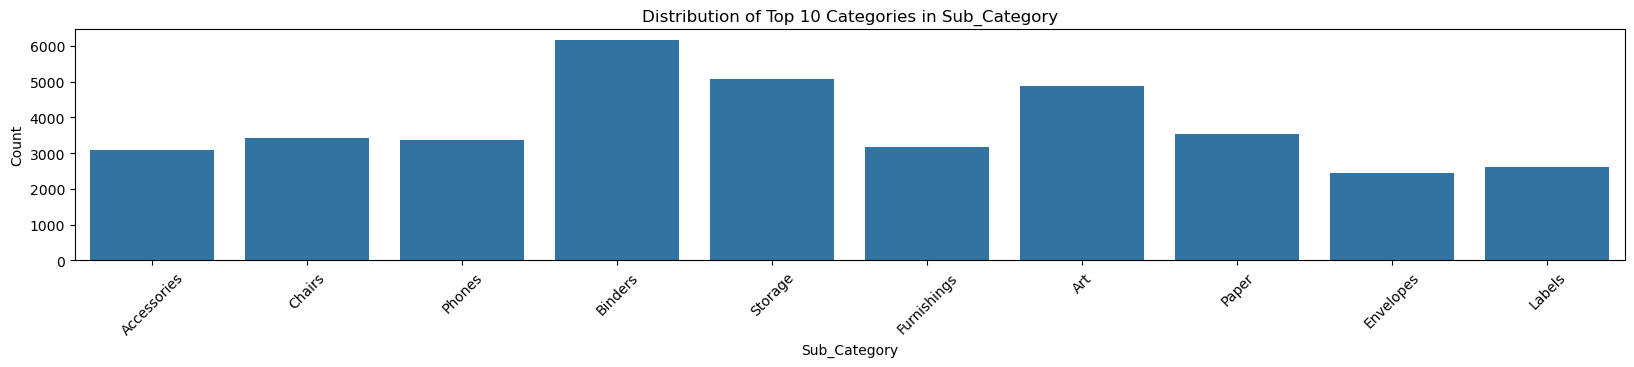

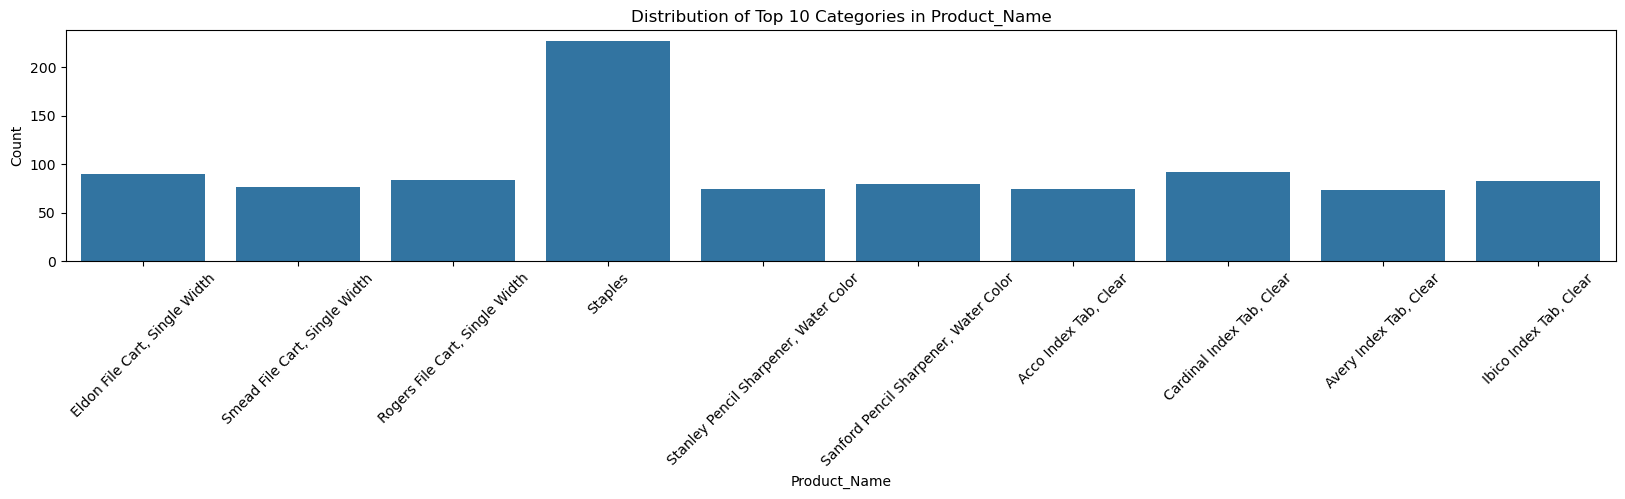

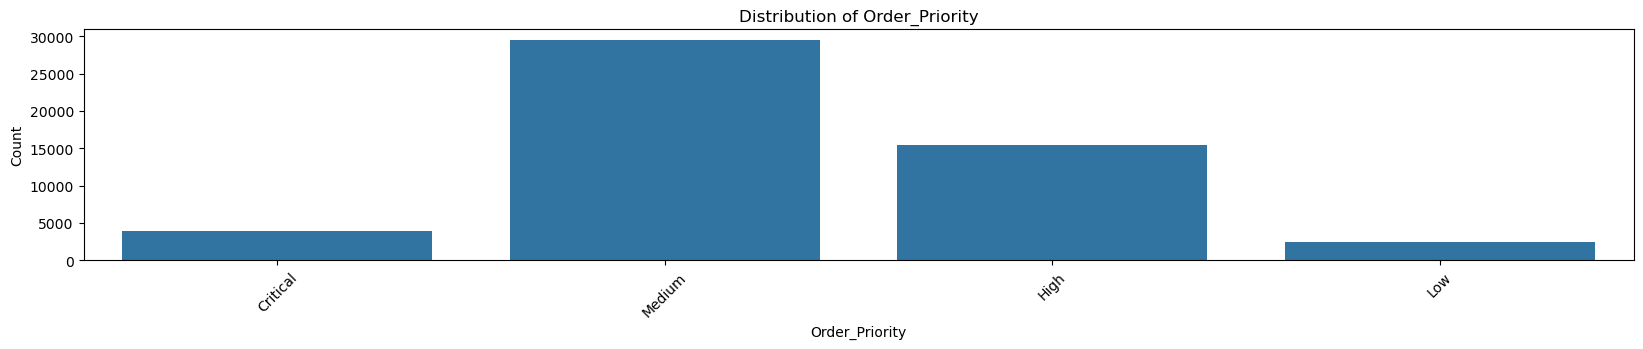

In [21]:

#Distribution of categorical variables:
import matplotlib.pyplot as plt
import seaborn as sns


top_n = 10
for col in categorical_cols:
    plt.figure(figsize=(20, 3))
    if Superstore_copy[col].nunique() > top_n:
        top_categories = Superstore_copy[col].value_counts().nlargest(top_n).index
        sns.countplot(data=Superstore_copy[Superstore_copy[col].isin(top_categories)], x=col)
        plt.title(f'Distribution of Top {top_n} Categories in {col}')
    else:
        sns.countplot(data=Superstore_copy, x=col)
        plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


In [22]:

#Outlier detection:
Superstore_copy[numerical_cols].columns


Index(['Row_ID', 'Postal_Code', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Cost'],
      dtype='object')

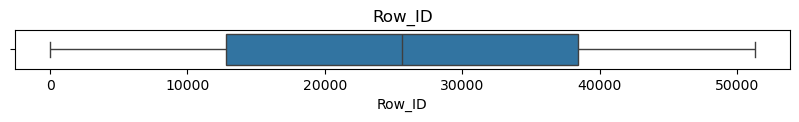

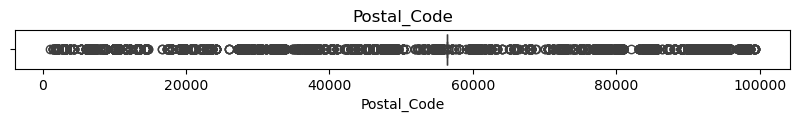

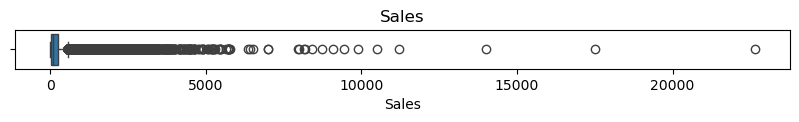

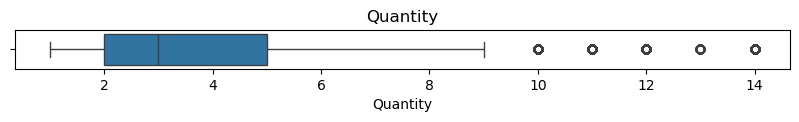

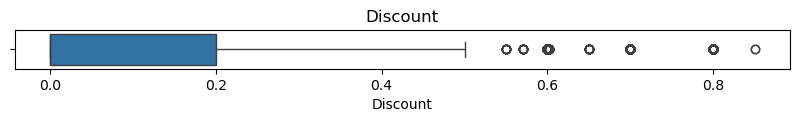

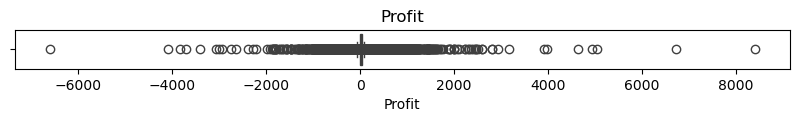

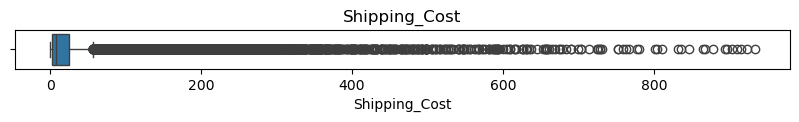

In [23]:
for i in Superstore_copy[numerical_cols].columns:
    plt.figure(figsize=(10,0.5))
    sns.boxplot(x=Superstore_copy[i])
    plt.title(i)
    plt.show()

In [24]:

#Handling Outliers:
'''We will create a user-defined function to calculate the upper and lower cutoff values 
needed for the IQR method.Then, we will use the clip function to handle and remove the 
outliers effectively.'''

def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc
    

In [25]:
Superstore_copy[numerical_cols].apply(outliertreat_IQR)

,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit,Shipping_Cost
0,-25643.5,56430.5,-299.683238,-2.5,-0.3,-55.215,-30.15
1,76934.5,56430.5,581.495063,9.5,0.5,92.025,57.21


In [26]:

Superstore_copy['Postal_Code'] = Superstore_copy.Postal_Code.clip(lower = 56430.5, upper = 56430.5)
Superstore_copy['Sales'] = Superstore_copy.Sales.clip(lower = -299.683238, upper = 581.495063)
Superstore_copy['Quantity'] = Superstore_copy.Quantity.clip(lower = -2.5, upper = 9.5)
Superstore_copy['Discount'] = Superstore_copy.Discount.clip(lower = -0.3, upper = 0.5)
Superstore_copy['Profit'] = Superstore_copy.Profit.clip(lower = -55.215, upper = 92.025)
Superstore_copy['Shipping_Cost'] = Superstore_copy.Shipping_Cost.clip(lower = -30.15, upper = 57.21)


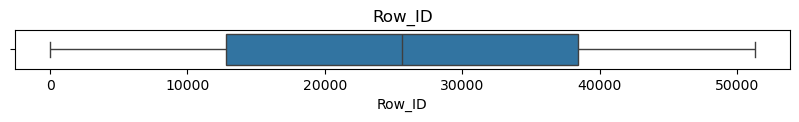

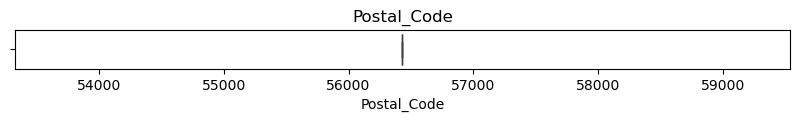

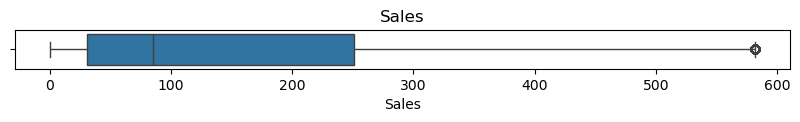

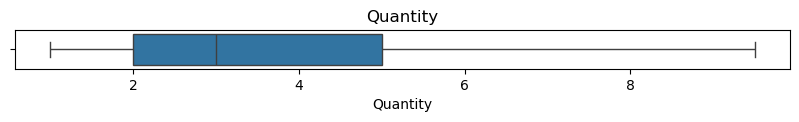

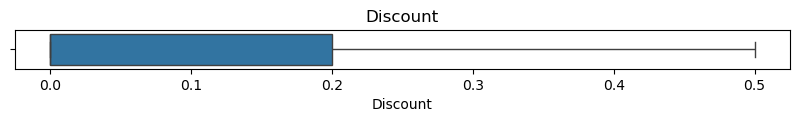

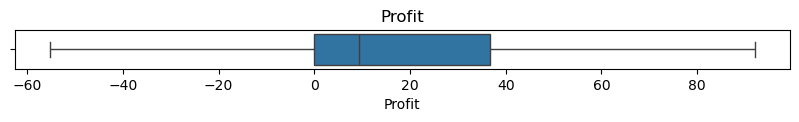

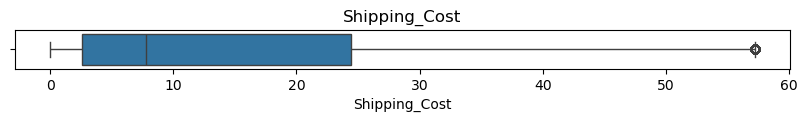

In [27]:
for i in Superstore_copy[numerical_cols].columns:
    plt.figure(figsize=(10,0.5))
    sns.boxplot(x=Superstore_copy[i])
    plt.title(i)
    plt.show()

In [ ]:
Superstore_copy.to_excel("Cleaned_Superstore_Dataset.xlsx", index = False)